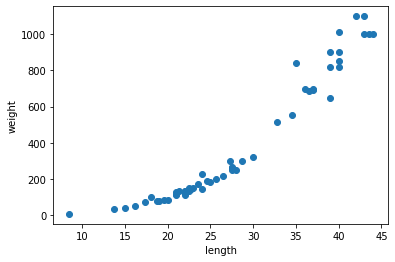

19.157142857142862


0.9698823289099254

In [9]:
import sklearn
import tensorflow

#농어 데이터

import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )


#농어의 길이만 사용

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight) #perch_weight 타겟 데이터 예측하고자 하는 대상값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#훈련세트 준비

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42) #회귀문제 에서는 stratify를 쓰지 않음 
    #perch_length가 길이 특성 하나만 사용하는 1차원 배열을 train_test_split에 넣으면 train_input, test_input 등도 다 1차원 배열
    #대부분의 머신러닝 라이브러리는 2차원배열을 기대하고 있으므로 위에 1차원 배열들을 2차원배열로 바꿔줘야 함 

    #사이킥런에서 타겟데이타 train_target test_target은 1차원 배열이고 2차원 배열로 바꾸지 않고 1차원 배열로 사용해도 괜찮음 훈련데이터 train_input test_input만 2차원 배열로 변경함 

train_input = train_input.reshape(-1, 1) #배열의 모양을 바꿀때 쓰는 함수 reshape 행차원을 -1로 지정 두번째 차원을 1로 둠 두번째 차원을 1로 두면 하나의 열이 있는 이차원 배열이 만들어짐
test_input = test_input.reshape(-1, 1) #행차원 -1의 의미는 나머지 차원이 결정되고 남은 차원을 내가 사용하겠다 남은 차원은 내 차원에 할당해라 2번째 차원이 1이니까 전체 샘플길이를 그대로 첫번째 차원에 사용하기 때문에 원소개수는 변하지 않고 형태만 바꿈
#[1,2,3] 1차원 배열로 돼있는 크기가 (3,)인 것을 reshape(-1,1)로 지정하면 세로로 [1] [2] [3] 열이 하나이고 행방향 개수는 남은차원을 다 사용 열이 하나 밖에 없으니 남은 차원 갯수는 원래 원소 개수 3개 크기 (3,1)

#회귀 모델 훈련 분류 KNeighborsClassifier 회귀 KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor() #클래스의 객체를 knr이라는 변수를 만들어서 할당을하고 
knr.fit(train_input, train_target) #훈련 데이터랑 타겟데이터를 fit으로 훈련 

knr.score(test_input, test_target) #테스트 세트를 집어넣어서 테스트세트의 대한 점수를 확인 score

from sklearn.metrics import mean_absolute_error #평균절대값오차 민엡솔루트애러
#평균절대값오차 민엡솔루트애러 평균제곱근오차 민스퀘어에러
test_prediction = knr.predict(test_input)#예측값을 predict 메소드에 넣어서 결과값을 prediction 매개변수에 전달  
mae = mean_absolute_error(test_target, test_prediction) #타깃값(target)과 예측값(prediction)의 절대값을 평균내서 전달
print(mae) #농어의 무게를 이 모델이 예측했는데 오차가 절대값 차이가 19정도 난다 

#과대적합과 과소적합 
# 테스트 세트가 훈련세트 보다 높으면 과소적합
# 테스트 세트가 0.6인데 훈련세트가 0.99면 과대적합 
knr.score(train_input, train_target) #0.96 과소적합 underfitting
knr.score(test_input, test_target) #0.99 과대적합 overfitting

#이웃 개수 줄이기




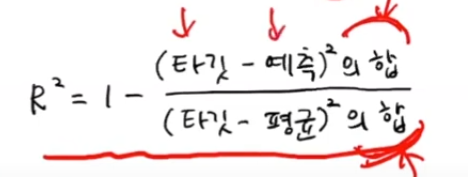

타깃 = test_target
예측 = test_input
샘플마다 다 빼서 제곱을 해서 다 더합니다 (분자)

테스트 타깃 - 테스트 타깃의 평균값 한 뒤 샘플마다 제곱을 해서 더합니다 (분모)

위 두개를 나누고 1에서 뺀 값을 R의 제곱 결정계수라 합니다 

예측이 평균 값과 비슷해지면(타겟 값의 평균정도만 예측한다면) 분모랑 분자가 비슷해져서 우측에 있는 항이 1이 되고 
R 스퀘어가 0에 가까운 값 1 - 1 이므로  

평균 정도만 예측한다면 R 스퀘어는 0에 가까워지므로 좋지 않음 

예측이 타겟을 정확하게 맞춘다면 분자가 0이 되고 우측항이 전부 0이되어 
R 스퀘어는 1에 가까운 값 

R스퀘어는 0에서 1사이에 값이 나옴 
1에 가까우면 좋은 회귀 모델 
0.5 밑에 내려가면 별로 좋지 않은 모델
